In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [55]:
data = pd.read_csv('VF_input.txt', sep="\t")
data

,amplicon_id,contig,amplicon_start,amplicon_end,amplicon_length,total_reads,strand_bias,gene,region,pool,Match
0,7162509462,chr1,18722630,18722936,306,878,-0.0356,.,BID,1,Normal
1,715467000a,chr1,155183615,155184264,649,372,0.0187,GBAP1,exon-13,1,Normal
2,715467001a,chr1,155184358,155184475,117,64,-0.7081,GBAP1,exon-12,1,Normal
3,715467002a,chr1,155184844,155184953,109,13,-0.1331,GBAP1,exon-11,1,Normal
4,715467003a,chr1,155185353,155185442,89,2,-1.0000,GBAP1,exon-10,1,Overcovered
...,...,...,...,...,...,...,...,...,...,...,...
316,7154803529,chrX,148586441,148586770,329,408,-0.2842,IDS,exon-1,2,Normal
317,7153512139,chrX,148586769,148586893,124,985,-0.0018,IDS,5'UTR,1,Undercovered
318,7154888288,chrY,2887635,2887961,326,0,NaN,.,BID,2,Undercovered
319,7162509459,chrY,15508535,15508841,306,0,NaN,.,BID,1,Undercovered


Пропущенных значений в *total reads* нет

In [56]:
data["total_reads"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 321 entries, 0 to 320
Series name: total_reads
Non-Null Count  Dtype
--------------  -----
321 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB


Считаем общее число ридов и переводим абсолютное число для каждого ампликона в относительное (*amp_proc*):

In [57]:
total_amp_number = data["total_reads"].sum()
total_amp_number

155321

In [58]:
data["amp_proc"] = data["total_reads"] / total_amp_number

In [59]:
data_sorted = data.sort_values(by=['amp_proc'])
data_sorted

,amplicon_id,contig,amplicon_start,amplicon_end,amplicon_length,total_reads,strand_bias,gene,region,pool,Match,amp_proc
320,7154888411,chrY,21717044,21717369,325,0,NaN,.,BID,2,Normal,0.000000
319,7162509459,chrY,15508535,15508841,306,0,NaN,.,BID,1,Undercovered,0.000000
13,715467012a,chr1,155197172,155197325,153,0,NaN,GBAP1,exon-1,1,Normal,0.000000
318,7154888288,chrY,2887635,2887961,326,0,NaN,.,BID,2,Undercovered,0.000000
5,715467004a,chr1,155185552,155185578,26,0,NaN,GBAP1,exon-9,1,Normal,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
91,7153451580,chr8,43028776,43028975,199,1242,-0.0782,HGSNAT,exon-9,2,Overcovered,0.007996
64,7162509467,chr5,2447959,2448225,266,1263,0.1492,.,BID,1,Overcovered,0.008132
297,7154404993,chrX,100652740,100652857,117,1265,-0.0727,GLA,exon-7,2,Normal,0.008144
139,7162509463,chr13,54060777,54061030,253,1270,-0.0547,.,BID,1,Overcovered,0.008177


Сортируем по возрастанию *amp_proc*

In [60]:
data_sorted['amp_serial_num'] = np.arange(data.shape[0])

In [61]:
data_sorted

,amplicon_id,contig,amplicon_start,amplicon_end,amplicon_length,total_reads,strand_bias,gene,region,pool,Match,amp_proc,amp_serial_num
320,7154888411,chrY,21717044,21717369,325,0,NaN,.,BID,2,Normal,0.000000,0
319,7162509459,chrY,15508535,15508841,306,0,NaN,.,BID,1,Undercovered,0.000000,1
13,715467012a,chr1,155197172,155197325,153,0,NaN,GBAP1,exon-1,1,Normal,0.000000,2
318,7154888288,chrY,2887635,2887961,326,0,NaN,.,BID,2,Undercovered,0.000000,3
5,715467004a,chr1,155185552,155185578,26,0,NaN,GBAP1,exon-9,1,Normal,0.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,7153451580,chr8,43028776,43028975,199,1242,-0.0782,HGSNAT,exon-9,2,Overcovered,0.007996,316
64,7162509467,chr5,2447959,2448225,266,1263,0.1492,.,BID,1,Overcovered,0.008132,317
297,7154404993,chrX,100652740,100652857,117,1265,-0.0727,GLA,exon-7,2,Normal,0.008144,318
139,7162509463,chr13,54060777,54061030,253,1270,-0.0547,.,BID,1,Overcovered,0.008177,319


In [62]:
X = np.array(data_sorted['amp_serial_num']).reshape(-1,1)
y = np.array(data_sorted['amp_proc']).reshape(-1,1)

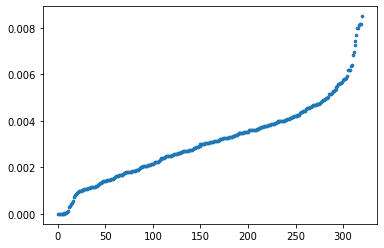

In [63]:
plt.scatter(X, y, s = 7)

Рассчитаем ожидаемое покрытие для каждого ампликона и значение R2. Если R2 меньше 0,85, дальше не идем

In [64]:
lin_reg = LinearRegression()

In [65]:
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)
r2 = r2_score(y, y_pred)
r2

0.9292143417429426

In [77]:
if r2 < 0.85:
    sys.exit()

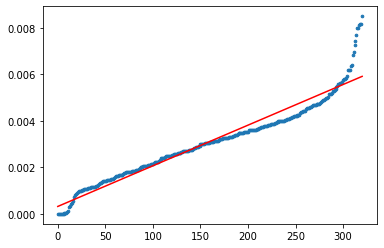

In [66]:
plt.scatter(X, y, s = 7)
plt.plot(X, y_pred, color = "red");

In [67]:
data_sorted["amp_proc_predict"] = y_pred
data_sorted

,amplicon_id,contig,amplicon_start,amplicon_end,amplicon_length,total_reads,strand_bias,gene,region,pool,Match,amp_proc,amp_serial_num,amp_proc_predict
320,7154888411,chrY,21717044,21717369,325,0,NaN,.,BID,2,Normal,0.000000,0,0.000321
319,7162509459,chrY,15508535,15508841,306,0,NaN,.,BID,1,Undercovered,0.000000,1,0.000339
13,715467012a,chr1,155197172,155197325,153,0,NaN,GBAP1,exon-1,1,Normal,0.000000,2,0.000356
318,7154888288,chrY,2887635,2887961,326,0,NaN,.,BID,2,Undercovered,0.000000,3,0.000373
5,715467004a,chr1,155185552,155185578,26,0,NaN,GBAP1,exon-9,1,Normal,0.000000,4,0.000391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,7153451580,chr8,43028776,43028975,199,1242,-0.0782,HGSNAT,exon-9,2,Overcovered,0.007996,316,0.005840
64,7162509467,chr5,2447959,2448225,266,1263,0.1492,.,BID,1,Overcovered,0.008132,317,0.005857
297,7154404993,chrX,100652740,100652857,117,1265,-0.0727,GLA,exon-7,2,Normal,0.008144,318,0.005875
139,7162509463,chr13,54060777,54061030,253,1270,-0.0547,.,BID,1,Overcovered,0.008177,319,0.005892


Найдем отношение реального и ожидаемого покрытия для каждого ампликона

In [68]:
data_sorted["ratio"] = abs(data_sorted["amp_proc"] / data_sorted["amp_proc_predict"])
data_sorted

,amplicon_id,contig,amplicon_start,amplicon_end,amplicon_length,total_reads,strand_bias,gene,region,pool,Match,amp_proc,amp_serial_num,amp_proc_predict,ratio
320,7154888411,chrY,21717044,21717369,325,0,NaN,.,BID,2,Normal,0.000000,0,0.000321,0.000000
319,7162509459,chrY,15508535,15508841,306,0,NaN,.,BID,1,Undercovered,0.000000,1,0.000339,0.000000
13,715467012a,chr1,155197172,155197325,153,0,NaN,GBAP1,exon-1,1,Normal,0.000000,2,0.000356,0.000000
318,7154888288,chrY,2887635,2887961,326,0,NaN,.,BID,2,Undercovered,0.000000,3,0.000373,0.000000
5,715467004a,chr1,155185552,155185578,26,0,NaN,GBAP1,exon-9,1,Normal,0.000000,4,0.000391,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,7153451580,chr8,43028776,43028975,199,1242,-0.0782,HGSNAT,exon-9,2,Overcovered,0.007996,316,0.005840,1.369323
64,7162509467,chr5,2447959,2448225,266,1263,0.1492,.,BID,1,Overcovered,0.008132,317,0.005857,1.388323
297,7154404993,chrX,100652740,100652857,117,1265,-0.0727,GLA,exon-7,2,Normal,0.008144,318,0.005875,1.386388
139,7162509463,chr13,54060777,54061030,253,1270,-0.0547,.,BID,1,Overcovered,0.008177,319,0.005892,1.387742


In [69]:
data_OS_output_undercovered = data_sorted.loc[data_sorted["ratio"] < 0.5]
data_OS_output_undercovered

,amplicon_id,contig,amplicon_start,amplicon_end,amplicon_length,total_reads,strand_bias,gene,region,pool,Match,amp_proc,amp_serial_num,amp_proc_predict,ratio
320,7154888411,chrY,21717044,21717369,325,0,NaN,.,BID,2,Normal,0.000000,0,0.000321,0.000000
319,7162509459,chrY,15508535,15508841,306,0,NaN,.,BID,1,Undercovered,0.000000,1,0.000339,0.000000
13,715467012a,chr1,155197172,155197325,153,0,NaN,GBAP1,exon-1,1,Normal,0.000000,2,0.000356,0.000000
318,7154888288,chrY,2887635,2887961,326,0,NaN,.,BID,2,Undercovered,0.000000,3,0.000373,0.000000
5,715467004a,chr1,155185552,155185578,26,0,NaN,GBAP1,exon-9,1,Normal,0.000000,4,0.000391,0.000000
9,715467008a,chr1,155187309,155187384,75,0,NaN,GBAP1,exon-5,1,Normal,0.000000,5,0.000408,0.000000
4,715467003a,chr1,155185353,155185442,89,2,-1.0000,GBAP1,exon-10,1,Overcovered,0.000013,6,0.000426,0.030239
83,7154978169,chr8,42995459,42995790,331,3,1.0000,HGSNAT,exon-1,2,Undercovered,0.000019,7,0.000443,0.043572
305,7154718034,chrX,100662629,100662931,302,8,0.0000,GLA,exon-1,2,Undercovered,0.000052,8,0.000461,0.111788
59,7154828154,chr4,996763,997099,336,9,-0.1914,IDUA,exon-10,2,Normal,0.000058,9,0.000478,0.121168


In [70]:
data_OS_output_overcovered = data_sorted.loc[data_sorted["ratio"] > 1.3]
data_OS_output_overcovered

,amplicon_id,contig,amplicon_start,amplicon_end,amplicon_length,total_reads,strand_bias,gene,region,pool,Match,amp_proc,amp_serial_num,amp_proc_predict,ratio
292,7156605435,chr22,51064941,51065264,323,139,-0.0125,ARSA,exon-4,2,Undercovered,0.000895,20,0.000670,1.335070
289,7163242937,chr22,51063878,51064212,334,149,-0.1737,ARSA,exon-8,1,Normal,0.000959,21,0.000688,1.394779
62,7154831106,chr4,997819,998112,293,151,0.1939,IDUA,exon-13,1,Undercovered,0.000972,22,0.000705,1.378499
120,7154673790,chr11,6414978,6415299,321,152,-0.0229,SMPD1,exon-5,2,Normal,0.000979,23,0.000723,1.354097
296,7154766740,chr22,51065937,51066258,321,154,-0.1125,ARSA,exon-1,2,Undercovered,0.000991,24,0.000740,1.339544
65,7154766874,chr5,73980830,73981160,330,158,0.1531,HEXB,exon-1,2,Normal,0.001017,25,0.000758,1.342659
56,7160002977,chr4,996097,996409,312,158,-0.1314,IDUA,exon-8,1,Undercovered,0.001017,26,0.000775,1.312407
101,7162509639,chr10,14208466,14208737,271,1195,0.0625,.,BID,1,Overcovered,0.007694,314,0.005805,1.325432
179,7154766870,chr15,72668206,72668381,175,1239,-0.0350,HEXA,exon-1,1,Normal,0.007977,315,0.005822,1.370112
91,7153451580,chr8,43028776,43028975,199,1242,-0.0782,HGSNAT,exon-9,2,Overcovered,0.007996,316,0.005840,1.369323


In [71]:
X_und = np.array(data_OS_output_undercovered['amp_serial_num']).reshape(-1,1)
y_und = np.array(data_OS_output_undercovered['amp_proc']).reshape(-1,1)
X_over = np.array(data_OS_output_overcovered['amp_serial_num']).reshape(-1,1)
y_over = np.array(data_OS_output_overcovered['amp_proc']).reshape(-1,1)

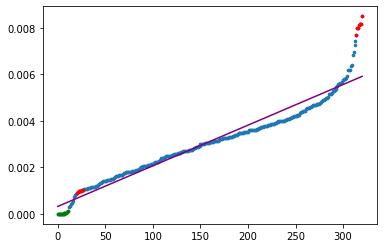

In [72]:
plt.scatter(X, y, s = 7)
plt.plot(X, y_pred, color = "purple")
plt.scatter(X_und, y_und, color = "green", s = 7)
plt.scatter(X_over, y_over, color = "red", s = 7)

Удалим добавленные колонки

In [73]:
data_OS_output_undercovered = data_OS_output_undercovered.drop(["amp_proc", "amp_serial_num", "amp_proc_predict", "ratio"],  axis=1)
data_OS_output_undercovered = data_OS_output_undercovered.sort_index()
data_OS_output_undercovered

,amplicon_id,contig,amplicon_start,amplicon_end,amplicon_length,total_reads,strand_bias,gene,region,pool,Match
3,715467002a,chr1,155184844,155184953,109,13,-0.1331,GBAP1,exon-11,1,Normal
4,715467003a,chr1,155185353,155185442,89,2,-1.0000,GBAP1,exon-10,1,Overcovered
5,715467004a,chr1,155185552,155185578,26,0,NaN,GBAP1,exon-9,1,Normal
9,715467008a,chr1,155187309,155187384,75,0,NaN,GBAP1,exon-5,1,Normal
13,715467012a,chr1,155197172,155197325,153,0,NaN,GBAP1,exon-1,1,Normal
59,7154828154,chr4,996763,997099,336,9,-0.1914,IDUA,exon-10,2,Normal
83,7154978169,chr8,42995459,42995790,331,3,1.0000,HGSNAT,exon-1,2,Undercovered
205,7154975997,chr17,40690508,40690836,328,17,-0.1019,NAGLU,exon-3,2,Normal
305,7154718034,chrX,100662629,100662931,302,8,0.0000,GLA,exon-1,2,Undercovered
318,7154888288,chrY,2887635,2887961,326,0,NaN,.,BID,2,Undercovered


In [75]:
data_OS_output_overcovered = data_OS_output_overcovered .drop(["amp_proc", "amp_serial_num", "amp_proc_predict", "ratio"],  axis=1)
data_OS_output_overcovered = data_OS_output_overcovered.sort_index()
data_OS_output_overcovered

,amplicon_id,contig,amplicon_start,amplicon_end,amplicon_length,total_reads,strand_bias,gene,region,pool,Match
56,7160002977,chr4,996097,996409,312,158,-0.1314,IDUA,exon-8,1,Undercovered
62,7154831106,chr4,997819,998112,293,151,0.1939,IDUA,exon-13,1,Undercovered
64,7162509467,chr5,2447959,2448225,266,1263,0.1492,.,BID,1,Overcovered
65,7154766874,chr5,73980830,73981160,330,158,0.1531,HEXB,exon-1,2,Normal
91,7153451580,chr8,43028776,43028975,199,1242,-0.0782,HGSNAT,exon-9,2,Overcovered
101,7162509639,chr10,14208466,14208737,271,1195,0.0625,.,BID,1,Overcovered
120,7154673790,chr11,6414978,6415299,321,152,-0.0229,SMPD1,exon-5,2,Normal
139,7162509463,chr13,54060777,54061030,253,1270,-0.0547,.,BID,1,Overcovered
179,7154766870,chr15,72668206,72668381,175,1239,-0.0350,HEXA,exon-1,1,Normal
275,7156587505,chr18,21136456,21136638,182,1319,-0.0618,NPC1,exon-8,2,Overcovered


In [76]:
data_OS_output_undercovered.to_csv("VF_output_undercovered.txt", sep="\t", index=False)
data_OS_output_overcovered.to_csv("VF_output_overcovered.txt", sep="\t", index=False)